# Lab 5: Graphs I

Lab associated with Module 5: Graphs I

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/hj/y7y354bs2bb13st04gc6_nq00000gn/T/ipykernel_58022/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

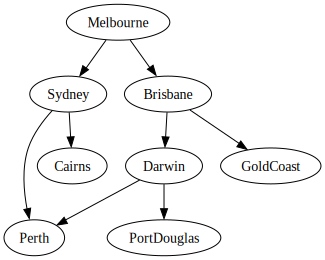

In [4]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')

#dot.view()
dot

This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

In [6]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [7]:
G = Graph()
for i in range(10):
    G.addVertex( Node(i) )

In [8]:
V = G.vertices
for i in range(9):
    G.addDiEdge( V[i], V[i+1] )

In [9]:
print(G)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



Okay, now that our implementation is working fine, let us try to plug-in our data

In [10]:
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [11]:
V = G.vertices

In [12]:
for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [13]:
#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )

In [14]:
print(G)

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [15]:
def DFS(root):
    
    if root == Null:
        return

    root.visited = True

    for n in root.neighbours:
        if n.visited == False:
            DFS(n)

In [16]:
def DFS_helper(w):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            
            DFS_helper(v)
    
    print(w)
    w.status = "done"
    
        
def DFS(w, G):
    
    for v in G.vertices:
        
        v.status = "unvisited"
        
    return DFS_helper(w)

In [17]:
# Let us do the DFS from Melbourne
w = G.vertices[0]

DFS(w, G)

Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne


### Section 4: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph, following is first implementation of BFS

In [ ]:
def BFS(root):

    visited = [False] * (num_nodes_in_graph)

    # Create a queue for BFS
    queue = []

    queue.append(root)
    visited[root] = True

    while queue:

        r = queue.pop(0)
        print(r)

        for n in r.adjacent:
            
            if visited[n] == False:
                
                visited[n] = True
                queue.append(n)
                

Let us have another impelementation of BFS

In [ ]:
def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)

In [ ]:
# Let us do the BFS from Melbourne
w = G.vertices[0]

BFS(w, G)

***

In [ ]:
#### Placeholder for this modules tasks ####
### Good Luck ###









***

### Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [ ]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [ ]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [ ]:
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [ ]:
def SCC(G, verbose=False):
    
    #### Placeholder for this modules tasks ####
    ### Good Luck ###
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

Test you code against the use case we did in the lecture

In [ ]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

print(G)

In [ ]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

***